In [1]:
!pip list | grep "torch\|tensorflow\|transformers\|opencv\|scikit-learn"


opencv-contrib-python              4.10.0.84
opencv-python                      4.10.0.84
opencv-python-headless             4.10.0.84
pytorch-ignite                     0.5.1
pytorch-lightning                  2.5.0.post0
scikit-learn                       1.2.2
scikit-learn-intelex               2025.2.0
sentence-transformers              3.3.1
tensorflow                         2.17.1
tensorflow-cloud                   0.1.5
tensorflow-datasets                4.9.7
tensorflow_decision_forests        1.10.0
tensorflow-hub                     0.16.1
tensorflow-io                      0.37.1
tensorflow-io-gcs-filesystem       0.37.1
tensorflow-metadata                1.13.1
tensorflow-probability             0.24.0
tensorflow-text                    2.17.0
torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchinfo                          1.8.0
torchmetrics                       1.6.1
torchsummary                       1.5.1
torchtune       

In [2]:
!apt-get update
!apt-get install -y fonts-noto


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]                                
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]                           
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease                                              
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,765 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                             
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,017 kB]                       
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]                
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]              
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,744 kB]         

In [3]:
!pip install torch torchvision transformers opencv-python scikit-learn googletrans==4.0.0rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=75c4ac3f1c412641be5774dcfab620bae3ec3b8aa7d37781523d2a3a14f89716
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hype

In [4]:
import pandas as pd

# Load the CSV file
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTyh006zrmSWoKAwqF92kZ4lvNRKsZL5NYIkdSEK3wtrWA8yMKLT6K3h1k1nyyHjG9ntZvc9tTcbUif/pub?output=csv'
df = pd.read_csv(url,encoding="utf-8")
df.head()


,id,caption,label,level,area,Unnamed: 5
0,1,গোমতী নদীর পানি উত্তর পাশে পালপাড়া অংশে বাঁধ থ...,flood,1.0,NaN,NaN
1,2,গোমতী নদীর পানি উত্তর পাশে পালপাড়া অংশে বাঁধ থ...,flood,1.0,NaN,NaN
2,3,কুমিল্লা,flood,1.0,কুমিল্লা,NaN
3,4,আখাউড়া উপজেলা ও কসবা উপজেলা'র বিভিন্ন এলাকায় ই...,flood,1.0,আখাউড়া,NaN
4,5,ফেনীর মুহুরী নদীতে পানির মাত্রা গত ৪০ বছরের ইত...,flood,1.0,ফেনী,NaN


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle, class_weight
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Drop unnecessary columns if they exist
columns_to_drop = [col for col in ['level', 'area', 'Unnamed: 5'] if col in df.columns]
df = df.drop(columns_to_drop, axis=1)

# Shuffle the dataframe
df = shuffle(df, random_state=42)

In [7]:
# Verify column names
print(df.columns)

Index([' id', 'caption', 'label'], dtype='object')


In [8]:
print(df['label'].unique())


['Anthropogenic' 'Non Informative' 'Fire' 'flood' 'Cyclone'
 'River Erosion' 'Earthquake']


In [9]:
import pandas as pd

# Define the mapping
label_mapping = {
    'flood': 0,
    'Cyclone': 1,
    'Earthquake': 2,
    'River Erosion': 3,
    'Fire' : 4,
    'Anthropogenic': 5
}

# Remove 'Non Informative' rows
df = df[df['label'] != 'Non Informative']

# Assign new integer labels
df['label'] = df['label'].map(label_mapping)

# Display updated labels
print(df['label'].unique())


[5 4 0 1 3 2]


In [10]:
print(df['label'].value_counts())

label
5    697
0    510
1    509
4    505
2    500
3    445
Name: count, dtype: int64


In [11]:
# Split the dataset
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

train_data, val_test = train_test_split(df, train_size=train_ratio, random_state=42)
valid_data, test_data = train_test_split(val_test, train_size=val_ratio / (val_ratio + test_ratio), random_state=42)

In [12]:
train_data.columns = train_data.columns.str.strip()
valid_data.columns = valid_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

# Prepare data for TextDataset
X_train = train_data['caption'].values
y_train = train_data['label'].values
X_valid = valid_data['caption'].values
y_valid = valid_data['label'].values
X_test = test_data['caption'].values
y_test = test_data['label'].values


In [13]:
import random

# Random Deletion
def random_deletion_bn(text, p=0.1):
    words = text.split()
    if len(words) == 1:
        return text
    remaining = [w for w in words if random.uniform(0,1) > p]
    if not remaining:
        return random.choice(words)
    return ' '.join(remaining)

# Random Swap
def random_swap_bn(text, n=1):
    words = text.split()
    length = len(words)
    if length < 2:
        return text
    for _ in range(n):
        idx1, idx2 = random.sample(range(length), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

# Character-level Noise
def char_noise_bn(text, p=0.03):
    noisy_text = ''
    for c in text:
        if random.uniform(0,1) < p and c != ' ':
            noisy_text += random.choice('অআইঈউঊঋএঐওঔকখগঘচছজঝটঠডঢতথদধনপফবভমযরলশষসহ')
        else:
            noisy_text += c
    return noisy_text

# Combine all augmentations
def augment_bengali_text(text):
    # Step 1: Random Deletion
    text = random_deletion_bn(text, p=0.1)
    # Step 2: Random Swap
    text = random_swap_bn(text, n=1)
    # Step 3: Character-level noise
    text = char_noise_bn(text, p=0.03)
    return text

# Apply augmentation to your dataset
df['caption_aug'] = df['caption'].apply(augment_bengali_text)

print(df[['caption', 'caption_aug']].head(10))  # Check a sample


                                                caption  \
1057  পাইলটের শেষ মুহূর্তের প্রচেষ্টা সত্ত্বেও দুর্ঘ...   
5405          বিকট শব্দে সিলিন্ডারবোঝাই ট্রাকে বিস্ফোরণ   
5628  গোপালগঞ্জে একটি ভবনে আগুন, দমকল বাহিনী দ্রুত ব...   
1406  মাদাগাস্কারের রেইনফরেস্টে বন উজাড়ের কারণে লেমু...   
2857  বন্যায় ভীষণভাবে ক্ষতিগ্রস্ত হয়েছে স্পেনের ভ্যা...   
1195  বাংলাদেশে গ্রামাঞ্চলে টিকা গ্রহণের হার কম, সংক...   
511   অনেকের বাড়ি আর ফিরে পাওয়া যাবে না… পথ এখন অনিশ...   
5077          দুশ্চিন্তায় কেটে যায় অনেক সময়, নদীতে ভাঙন   
3055  ঘূর্ণিঝড় ইয়াসে লন্ডভন্ড সেন্ট মার্টিনের পর্যট...   
3172        প্রবল ঘূর্ণিঝড় থেকে স্থল নিম্নচাপ 'বুলবুল'   

                                            caption_aug  
1057  সত্ত্বেও শেষ মুহূগ্তের প্রচেষ্টা পাইলটের দুর্ঘ...  
5405                 বিকট বিস্ফোরণ সিলিন্ডারবোঝাই শব্দে  
5628  একটি গোপালগঞ্জে আগুন, দমকল বাহিনী দ্রুত ব্যবস্...  
1406  মাছাগাস্কারের রেইনফরেস্ঘে হ্রাস কারণে লেমুর র্...  
2857  ভীষণভাবে প্রদেশ হয়েছে স্পেনের ভ্যালেন্সিয়া ক্ষ...  
11

In [14]:
# 3️⃣ Tokenizer & Dataset
tokenizer = BertTokenizer.from_pretrained('sagorsarker/bangla-bert-base')


class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text, padding='max_length', truncation=True, max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets
train_ds = TextDataset(X_train, y_train, tokenizer)
valid_ds = TextDataset(X_valid, y_valid, tokenizer)
test_ds = TextDataset(X_test, y_test, tokenizer)

# Create data loaders
train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=16)
test_dl = DataLoader(test_ds, batch_size=16)

vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

In [15]:
import torch
from sklearn.utils.class_weight import compute_class_weight

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(df['label']), y=df['label'])
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BertForSequenceClassification.from_pretrained('sagorsarker/bangla-bert-base', num_labels=6).to(device)

# Training setup
optimizer = AdamW(model.parameters(), lr=1e-6, weight_decay=1e-4)
total_steps = len(train_dl) * 20
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

patience = 4
best_val_loss = float('inf')
epochs_no_improve = 0
early_stop = False

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
for epoch in range(20):
    if early_stop:
        print("Early stopping triggered")
        break
    
    model.train()
    total_loss = 0
    correct, total = 0, 0
    for batch in tqdm(train_dl, desc=f'Epoch {epoch+1}'):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        weighted_loss = torch.mean(loss * class_weights[labels])  # Apply class weights
        weighted_loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += weighted_loss.item()

        preds = torch.argmax(outputs.logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = total_loss / len(train_dl)
    train_acc = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    print(f"Epoch {epoch+1}, Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_acc:.2f}%")

    model.eval()
    val_loss = 0
    correct, total = 0, 0
    with torch.no_grad():
        for batch in valid_dl:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()

            preds = torch.argmax(outputs.logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(valid_dl)
    val_acc = 100 * correct / total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"No improvement in validation loss for {patience} epochs. Stopping training.")
            early_stop = True

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1: 100%|██████████| 119/119 [00:27<00:00,  4.39it/s]


Epoch 1, Training Loss: 1.7628, Training Accuracy: 23.59%
Validation Loss: 1.6833, Validation Accuracy: 31.75%


Epoch 2: 100%|██████████| 119/119 [00:27<00:00,  4.40it/s]


Epoch 2, Training Loss: 1.6269, Training Accuracy: 38.39%
Validation Loss: 1.5595, Validation Accuracy: 42.97%


Epoch 3: 100%|██████████| 119/119 [00:26<00:00,  4.48it/s]


Epoch 3, Training Loss: 1.5024, Training Accuracy: 48.39%
Validation Loss: 1.4220, Validation Accuracy: 55.92%


Epoch 4: 100%|██████████| 119/119 [00:26<00:00,  4.41it/s]


Epoch 4, Training Loss: 1.3648, Training Accuracy: 61.08%
Validation Loss: 1.2640, Validation Accuracy: 63.35%


Epoch 5: 100%|██████████| 119/119 [00:26<00:00,  4.44it/s]


Epoch 5, Training Loss: 1.2103, Training Accuracy: 68.98%
Validation Loss: 1.0980, Validation Accuracy: 71.56%


Epoch 6: 100%|██████████| 119/119 [00:26<00:00,  4.46it/s]


Epoch 6, Training Loss: 1.0551, Training Accuracy: 76.30%
Validation Loss: 0.9437, Validation Accuracy: 76.30%


Epoch 7: 100%|██████████| 119/119 [00:26<00:00,  4.44it/s]


Epoch 7, Training Loss: 0.9143, Training Accuracy: 80.31%
Validation Loss: 0.8122, Validation Accuracy: 80.73%


Epoch 8: 100%|██████████| 119/119 [00:26<00:00,  4.46it/s]


Epoch 8, Training Loss: 0.7924, Training Accuracy: 83.04%
Validation Loss: 0.7120, Validation Accuracy: 81.83%


Epoch 9: 100%|██████████| 119/119 [00:26<00:00,  4.44it/s]


Epoch 9, Training Loss: 0.6949, Training Accuracy: 84.83%
Validation Loss: 0.6347, Validation Accuracy: 83.57%


Epoch 10: 100%|██████████| 119/119 [00:26<00:00,  4.45it/s]


Epoch 10, Training Loss: 0.6303, Training Accuracy: 86.10%
Validation Loss: 0.5776, Validation Accuracy: 84.52%


Epoch 11: 100%|██████████| 119/119 [00:26<00:00,  4.45it/s]


Epoch 11, Training Loss: 0.5731, Training Accuracy: 87.26%
Validation Loss: 0.5369, Validation Accuracy: 84.04%


Epoch 12: 100%|██████████| 119/119 [00:26<00:00,  4.44it/s]


Epoch 12, Training Loss: 0.5295, Training Accuracy: 88.05%
Validation Loss: 0.5063, Validation Accuracy: 84.36%


Epoch 13: 100%|██████████| 119/119 [00:26<00:00,  4.45it/s]


Epoch 13, Training Loss: 0.4985, Training Accuracy: 89.52%
Validation Loss: 0.4822, Validation Accuracy: 84.83%


Epoch 14: 100%|██████████| 119/119 [00:26<00:00,  4.45it/s]


Epoch 14, Training Loss: 0.4722, Training Accuracy: 88.84%
Validation Loss: 0.4626, Validation Accuracy: 85.47%


Epoch 15: 100%|██████████| 119/119 [00:26<00:00,  4.44it/s]


Epoch 15, Training Loss: 0.4414, Training Accuracy: 90.68%
Validation Loss: 0.4493, Validation Accuracy: 86.10%


Epoch 16: 100%|██████████| 119/119 [00:26<00:00,  4.44it/s]


Epoch 16, Training Loss: 0.4295, Training Accuracy: 90.52%
Validation Loss: 0.4392, Validation Accuracy: 86.41%


Epoch 17: 100%|██████████| 119/119 [00:26<00:00,  4.44it/s]


Epoch 17, Training Loss: 0.4119, Training Accuracy: 90.47%
Validation Loss: 0.4306, Validation Accuracy: 86.89%


Epoch 18: 100%|██████████| 119/119 [00:26<00:00,  4.45it/s]


Epoch 18, Training Loss: 0.4091, Training Accuracy: 90.68%
Validation Loss: 0.4256, Validation Accuracy: 86.73%


Epoch 19: 100%|██████████| 119/119 [00:26<00:00,  4.44it/s]


Epoch 19, Training Loss: 0.4052, Training Accuracy: 90.78%
Validation Loss: 0.4223, Validation Accuracy: 86.89%


Epoch 20: 100%|██████████| 119/119 [00:26<00:00,  4.45it/s]


Epoch 20, Training Loss: 0.4038, Training Accuracy: 90.57%
Validation Loss: 0.4214, Validation Accuracy: 86.89%


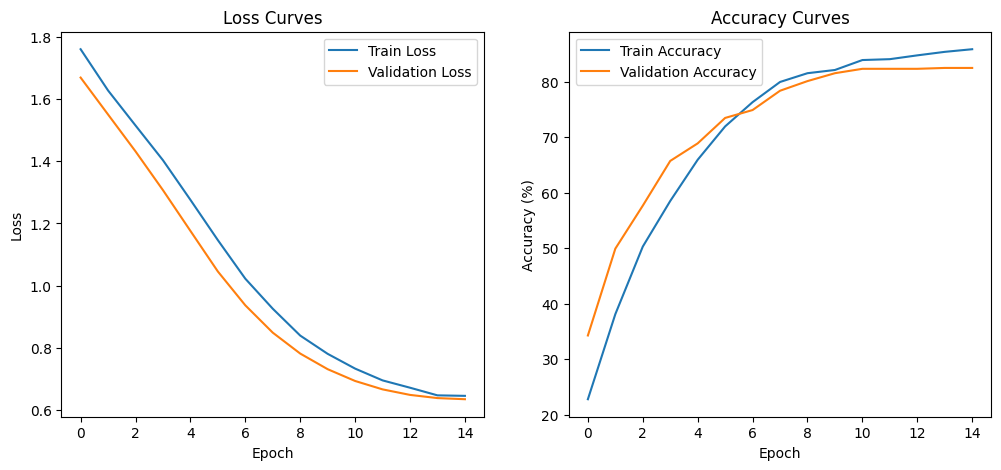

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy Curves')

plt.savefig('training_curves.png')  # Save the figure as a file

plt.show()


In [18]:
import pandas as pd

# Create a DataFrame for easy visualization
df = pd.DataFrame({
    'Epoch': range(1, len(train_losses)+1),
    'Train Loss': train_losses,
    'Validation Loss': val_losses,
    'Train Accuracy (%)': train_accuracies,
    'Validation Accuracy (%)': val_accuracies
})

print(df)

# Optionally, save to a CSV file for later analysis
df.to_csv('training_metrics.csv', index=False)


    Epoch  Train Loss  Validation Loss  Train Accuracy (%)  \
0       1    1.761277         1.669935           22.801474   
1       2    1.628321         1.550930           38.125329   
2       3    1.515612         1.432196           50.289626   
3       4    1.403658         1.307270           58.504476   
4       5    1.276090         1.176038           65.929437   
5       6    1.146253         1.045239           71.932596   
6       7    1.022044         0.936302           76.303318   
7       8    0.925319         0.848217           79.936809   
8       9    0.838815         0.780864           81.516588   
9      10    0.779979         0.730525           82.095840   
10     11    0.732420         0.692551           83.886256   
11     12    0.694441         0.665517           84.044234   
12     13    0.670860         0.647699           84.728805   
13     14    0.646253         0.637469           85.360716   
14     15    0.644636         0.633791           85.834650   

    Val

Test Accuracy: 86.12%

Classification Report:
              precision    recall  f1-score   support

           0     0.8673    0.8596    0.8634       114
           1     0.8333    0.8065    0.8197        93
           2     0.8372    0.8571    0.8471        84
           3     0.8696    0.7921    0.8290       101
           4     0.9009    0.8929    0.8969       112
           5     0.8521    0.9308    0.8897       130

    accuracy                         0.8612       634
   macro avg     0.8601    0.8565    0.8576       634
weighted avg     0.8615    0.8612    0.8607       634



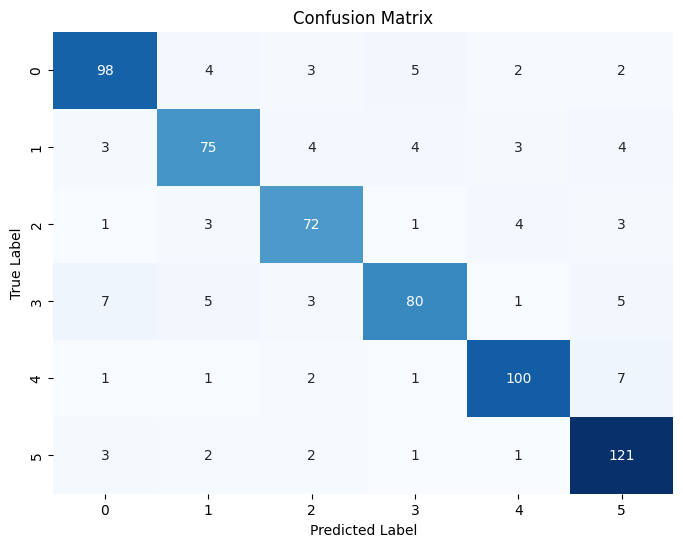

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_dl:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Accuracy
accuracy = 100 * (sum(1 for x, y in zip(all_preds, all_labels) if x == y) / len(all_labels))
print(f"Test Accuracy: {accuracy:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, digits=4))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [20]:
import torch
from transformers import BertModel, BertForSequenceClassification

# Load the model
model = BertForSequenceClassification.from_pretrained('sagorsarker/bangla-bert-base', num_labels=6)

# Function to count parameters in a module
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Count parameters for each component
print("Embeddings:", count_parameters(model.bert.embeddings))
print("Transformer Layers:", sum(count_parameters(layer) for layer in model.bert.encoder.layer))
print("Pooler:", count_parameters(model.bert.pooler))
print("Classification Head:", count_parameters(model.classifier))
print("Total:", count_parameters(model))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embeddings: 78751488
Transformer Layers: 85054464
Pooler: 590592
Classification Head: 4614
Total: 164401158
